In [1]:
#import the libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
#Pandas plotting
from pandas.plotting import lag_plot
#datetime
from pandas import datetime

In [2]:
#Import ARIMA model
from statsmodels.tsa.arima_model import ARIMA
from sklearn.metrics import mean_squared_error

C:\Users\BrindhaM\Anaconda3\lib\site-packages\statsmodels\compat\pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


In [3]:
#import the data
url="https://raw.githubusercontent.com/mwitiderrick/stockprice/master/NSE-TATAGLOBAL.csv"
#use dataframe
df=pd.read_csv(url)
#print the df
df

,Date,Open,High,Low,Last,Close,Total Trade Quantity,Turnover (Lacs)
0,2018-09-28,234.05,235.95,230.20,233.50,233.75,3069914,7162.35
1,2018-09-27,234.55,236.80,231.10,233.80,233.25,5082859,11859.95
2,2018-09-26,240.00,240.00,232.50,235.00,234.25,2240909,5248.60
3,2018-09-25,233.30,236.75,232.00,236.25,236.10,2349368,5503.90
4,2018-09-24,233.55,239.20,230.75,234.00,233.30,3423509,7999.55
5,2018-09-21,235.00,237.00,227.95,233.75,234.60,5395319,12589.59
6,2018-09-19,235.95,237.20,233.45,234.60,234.90,1362058,3202.78
7,2018-09-18,237.90,239.25,233.50,235.50,235.05,2614794,6163.70
8,2018-09-17,233.15,238.00,230.25,236.40,236.60,3170894,7445.41
9,2018-09-14,223.45,236.70,223.30,234.00,233.95,6377909,14784.50


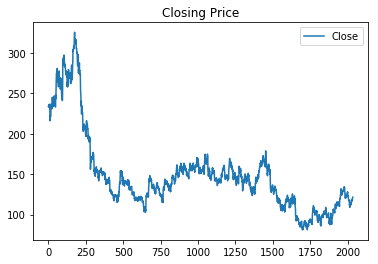

In [4]:
%matplotlib inline
df[['Close']].plot()
plt.title("Closing Price")
plt.show()

In [5]:
#Plot the cumulative sum
dr=df.cumsum()
#dr
dr


,Date,Open,High,Low,Last,Close,Total Trade Quantity,Turnover (Lacs)
0,2018-09-28,234.05,235.95,230.2,233.5,233.75,3069914,7162.35
1,2018-09-282018-09-27,468.6,472.75,461.3,467.3,467,8152773,19022.3
2,2018-09-282018-09-272018-09-26,708.6,712.75,693.8,702.3,701.25,10393682,24270.9
3,2018-09-282018-09-272018-09-262018-09-25,941.9,949.5,925.8,938.55,937.35,12743050,29774.8
4,2018-09-282018-09-272018-09-262018-09-252018-0...,1175.45,1188.7,1156.55,1172.55,1170.65,16166559,37774.4
5,2018-09-282018-09-272018-09-262018-09-252018-0...,1410.45,1425.7,1384.5,1406.3,1405.25,21561878,50363.9
6,2018-09-282018-09-272018-09-262018-09-252018-0...,1646.4,1662.9,1617.95,1640.9,1640.15,22923936,53566.7
7,2018-09-282018-09-272018-09-262018-09-252018-0...,1884.3,1902.15,1851.45,1876.4,1875.2,25538730,59730.4
8,2018-09-282018-09-272018-09-262018-09-252018-0...,2117.45,2140.15,2081.7,2112.8,2111.8,28709624,67175.8
9,2018-09-282018-09-272018-09-262018-09-252018-0...,2340.9,2376.85,2305,2346.8,2345.75,35087533,81960.3


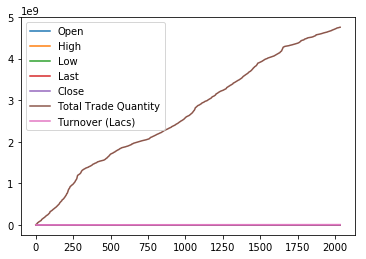

In [6]:
#plot the cumsum
dr.plot()
plt.show()

Text(0.5,1,'Auto correlatin plot with lag 1')

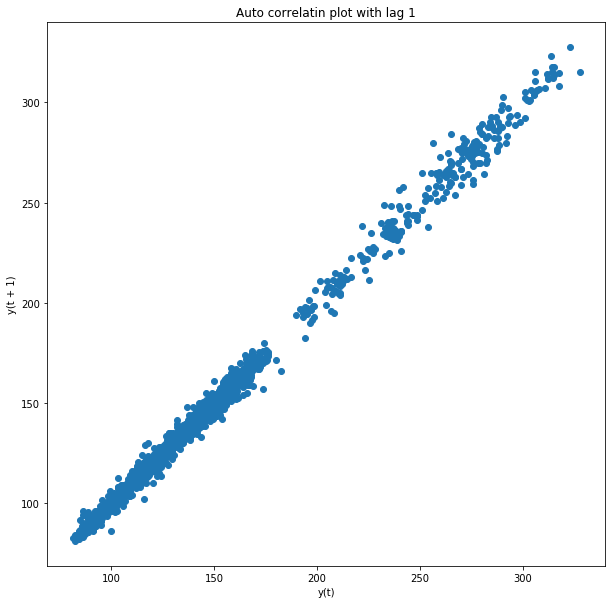

In [7]:
plt.figure(figsize=(10,10))
#draw an auto correlation plot on 'Open' prices
#lag by 1
lag_plot(df['Open'])
plt.title("Auto correlatin plot with lag 1")


Text(0.5,1,'Auto correlatin plot with lag 5')

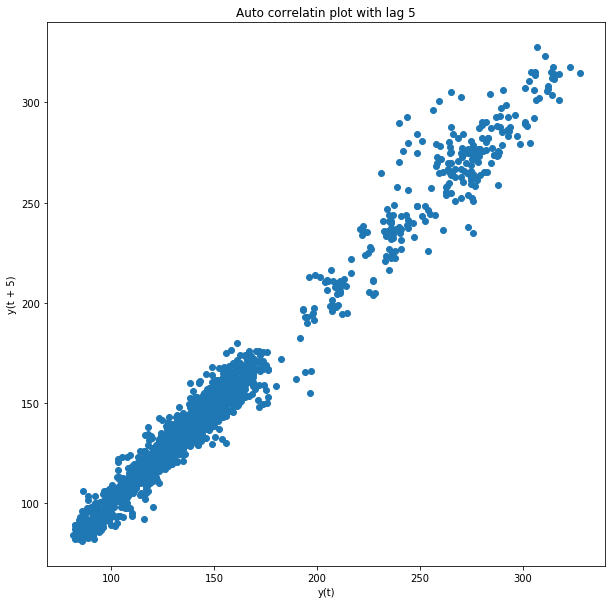

In [8]:
plt.figure(figsize=(10,10))
#draw an auto correlation plot on 'Open' prices
#lag by 5
lag_plot(df['Open'],lag=5)
plt.title("Auto correlatin plot with lag 5")

# ARIMA (AutoRegressive Integrated Moving Average) for Time Series Prediction

In [9]:
#Divide the data set into traina nd test data set
#lets predict the Opening price of the stock

In [10]:
df['Date'][1800]

'2011-06-24'

In [11]:
#training data = 80% of dataframe
#test data = 20%
train_data=df[0:int(len(df)*0.8)]
test_data=df[int(len(df)*0.8):]

In [12]:
#display the train and test data
train_data

,Date,Open,High,Low,Last,Close,Total Trade Quantity,Turnover (Lacs)
0,2018-09-28,234.05,235.95,230.20,233.50,233.75,3069914,7162.35
1,2018-09-27,234.55,236.80,231.10,233.80,233.25,5082859,11859.95
2,2018-09-26,240.00,240.00,232.50,235.00,234.25,2240909,5248.60
3,2018-09-25,233.30,236.75,232.00,236.25,236.10,2349368,5503.90
4,2018-09-24,233.55,239.20,230.75,234.00,233.30,3423509,7999.55
5,2018-09-21,235.00,237.00,227.95,233.75,234.60,5395319,12589.59
6,2018-09-19,235.95,237.20,233.45,234.60,234.90,1362058,3202.78
7,2018-09-18,237.90,239.25,233.50,235.50,235.05,2614794,6163.70
8,2018-09-17,233.15,238.00,230.25,236.40,236.60,3170894,7445.41
9,2018-09-14,223.45,236.70,223.30,234.00,233.95,6377909,14784.50


In [13]:
#display the test data
test_data

,Date,Open,High,Low,Last,Close,Total Trade Quantity,Turnover (Lacs)
1628,2012-03-03,120.70,121.50,117.90,120.60,120.40,249882,300.14
1629,2012-03-02,124.25,124.30,119.85,120.60,120.55,1933023,2351.94
1630,2012-03-01,125.95,126.45,120.50,123.00,123.35,2169528,2682.75
1631,2012-02-29,122.20,128.80,121.85,125.70,125.55,6964341,8756.38
1632,2012-02-28,113.75,122.25,113.75,122.00,120.70,3650262,4304.20
1633,2012-02-27,119.00,120.20,112.00,113.10,113.05,1524588,1756.34
1634,2012-02-24,121.00,121.90,118.50,119.85,119.95,2583514,3101.74
1635,2012-02-23,117.00,122.80,116.10,120.70,120.00,6664371,8010.66
1636,2012-02-22,121.90,122.10,114.50,118.15,117.20,3550314,4178.68
1637,2012-02-21,119.95,122.95,119.30,120.90,120.80,2567921,3104.05


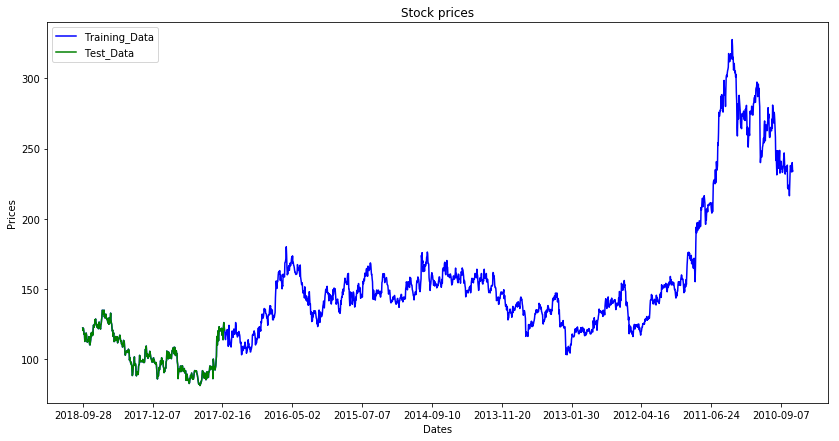

In [14]:
#plot the details
plt.figure(figsize=(14,7))
plt.title("Stock prices")
plt.xlabel("Dates")
plt.ylabel("Prices")
plt.plot(df['Date'],df['Open'],'blue',label='Training_Data')
plt.plot(test_data['Date'],test_data['Open'],'green',label='Test_Data')
plt.xticks(np.arange(0,2034,200),df['Date'][0:2034:200])
plt.legend()
plt.show()

In [15]:
#Defie the error message
#Symmetric Mean Absolute Percentage Error (SMAPE)
def smape_kun(y_true,y_pred):
    return np.mean((np.abs(y_pred-y_true))*200/(np.abs(y_pred)+np.abs(y_true)))

In [16]:
train_val=train_data['Open'].values
test_val=test_data['Open'].values


In [17]:
history=[X for X in train_val]
print(type(history))

<class 'list'>


In [19]:
predictions=[]
for i in range(len(test_val)):
    #p=5(Autoregression), d=1(diff) and q=0(Moving average) 
    model=ARIMA(history,order=(5,1,0))
    model_fit=model.fit(disp=0)
    output=model_fit.forecast()
    print("i=",i)
    print("output=",output)
    #output is of the form : 
    #predicted value
    #
    #prediction interval
    yhat=output[0]
    print("yhat=",yhat)
    predictions.append(yhat)
    obs=test_val[i]
    history.append(obs)

C:\Users\BrindhaM\Anaconda3\lib\site-packages\statsmodels\tsa\kalmanf\kalmanfilter.py:646: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  if issubdtype(paramsdtype, float):
C:\Users\BrindhaM\Anaconda3\lib\site-packages\statsmodels\tsa\kalmanf\kalmanfilter.py:650: FutureWarning: Conversion of the second argument of issubdtype from `complex` to `np.complexfloating` is deprecated. In future, it will be treated as `np.complex128 == np.dtype(complex).type`.
  elif issubdtype(paramsdtype, complex):
C:\Users\BrindhaM\Anaconda3\lib\site-packages\statsmodels\tsa\kalmanf\kalmanfilter.py:577: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  if issubdtype(paramsdtype, float):


i= 0
output= (array([119.55583976]), array([3.72445672]), array([[112.25603873, 126.85564079]]))
yhat= [119.55583976]
i= 1
output= (array([120.70717888]), array([3.72342045]), array([[113.40940891, 128.00494886]]))
yhat= [120.70717888]
i= 2
output= (array([124.12949761]), array([3.7233094]), array([[116.83194529, 131.42704993]]))
yhat= [124.12949761]
i= 3
output= (array([125.57989834]), array([3.72243931]), array([[118.28405136, 132.87574533]]))
yhat= [125.57989834]
i= 4
output= (array([122.27821349]), array([3.72223616]), array([[114.98276467, 129.57366231]]))
yhat= [122.27821349]
i= 5
output= (array([114.1426193]), array([3.72706058]), array([[106.83771478, 121.44752381]]))
yhat= [114.1426193]
i= 6
output= (array([118.44588599]), array([3.72784735]), array([[111.13943944, 125.75233254]]))
yhat= [118.44588599]
i= 7
output= (array([120.59647107]), array([3.72723901]), array([[113.29121684, 127.9017253 ]]))
yhat= [120.59647107]
i= 8
output= (array([117.61675244]), array([3.72715403]), a

i= 71
output= (array([81.08939312]), array([3.72574338]), array([[73.78707027, 88.39171597]]))
yhat= [81.08939312]
i= 72
output= (array([82.45663432]), array([3.72482689]), array([[75.15610777, 89.75716087]]))
yhat= [82.45663432]
i= 73
output= (array([82.02943825]), array([3.72374123]), array([[74.73103956, 89.32783695]]))
yhat= [82.02943825]
i= 74
output= (array([82.45210075]), array([3.72266396]), array([[75.15581347, 89.74838803]]))
yhat= [82.45210075]
i= 75
output= (array([82.10600157]), array([3.7215752]), array([[74.81184822, 89.40015493]]))
yhat= [82.10600157]
i= 76
output= (array([83.75010671]), array([3.72076524]), array([[76.45754084, 91.04267258]]))
yhat= [83.75010671]
i= 77
output= (array([85.63663046]), array([3.72003765]), array([[78.34549065, 92.92777027]]))
yhat= [85.63663046]
i= 78
output= (array([87.03259999]), array([3.71913914]), array([[79.74322123, 94.32197875]]))
yhat= [87.03259999]
i= 79
output= (array([88.96520628]), array([3.71841887]), array([[81.67723922, 96

i= 142
output= (array([102.82908939]), array([3.67911153]), array([[ 95.6181633 , 110.04001549]]))
yhat= [102.82908939]
i= 143
output= (array([107.53647063]), array([3.68020314]), array([[100.32340501, 114.74953625]]))
yhat= [107.53647063]
i= 144
output= (array([108.33419331]), array([3.67922114]), array([[101.12305238, 115.54533423]]))
yhat= [108.33419331]
i= 145
output= (array([104.15364747]), array([3.67982676]), array([[ 96.94131955, 111.36597539]]))
yhat= [104.15364747]
i= 146
output= (array([105.32892365]), array([3.67894865]), array([[ 98.11831679, 112.53953051]]))
yhat= [105.32892365]
i= 147
output= (array([107.60482559]), array([3.67854167]), array([[100.3950164 , 114.81463478]]))
yhat= [107.60482559]
i= 148
output= (array([107.85453392]), array([3.67750825]), array([[100.6467502 , 115.06231764]]))
yhat= [107.85453392]
i= 149
output= (array([107.25898127]), array([3.67651631]), array([[100.05314171, 114.46482083]]))
yhat= [107.25898127]
i= 150
output= (array([105.78904629]), a

i= 212
output= (array([100.90996629]), array([3.6397391]), array([[ 93.77620875, 108.04372383]]))
yhat= [100.90996629]
i= 213
output= (array([102.44904321]), array([3.63898898]), array([[ 95.31675586, 109.58133056]]))
yhat= [102.44904321]
i= 214
output= (array([104.5124951]), array([3.63841281]), array([[ 97.38133703, 111.64365318]]))
yhat= [104.5124951]
i= 215
output= (array([105.36572247]), array([3.63749778]), array([[ 98.23635783, 112.49508711]]))
yhat= [105.36572247]
i= 216
output= (array([102.57854381]), array([3.63714434]), array([[ 95.4498719 , 109.70721572]]))
yhat= [102.57854381]
i= 217
output= (array([102.79902514]), array([3.63616827]), array([[ 95.67226629, 109.92578398]]))
yhat= [102.79902514]
i= 218
output= (array([101.35154468]), array([3.63530832]), array([[ 94.22647129, 108.47661806]]))
yhat= [101.35154468]
i= 219
output= (array([101.9651331]), array([3.63435488]), array([[ 94.84192844, 109.08833776]]))
yhat= [101.9651331]
i= 220
output= (array([100.56023096]), array(

i= 282
output= (array([105.22180423]), array([3.60577715]), array([[ 98.15461088, 112.28899758]]))
yhat= [105.22180423]
i= 283
output= (array([105.09875056]), array([3.60483418]), array([[ 98.0334054 , 112.16409572]]))
yhat= [105.09875056]
i= 284
output= (array([103.79269154]), array([3.60401328]), array([[ 96.72895531, 110.85642778]]))
yhat= [103.79269154]
i= 285
output= (array([102.70051468]), array([3.60315729]), array([[ 95.63845616, 109.76257319]]))
yhat= [102.70051468]
i= 286
output= (array([104.33882411]), array([3.60246343]), array([[ 97.27812553, 111.39952268]]))
yhat= [104.33882411]
i= 287
output= (array([108.30452721]), array([3.60290052]), array([[101.24297196, 115.36608247]]))
yhat= [108.30452721]
i= 288
output= (array([111.84941149]), array([3.60300225]), array([[104.78765684, 118.91116614]]))
yhat= [111.84941149]
i= 289
output= (array([112.84388377]), array([3.60214167]), array([[105.78381582, 119.90395171]]))
yhat= [112.84388377]
i= 290
output= (array([113.09327414]), a

i= 351
output= (array([134.82406994]), array([3.5663335]), array([[127.83418473, 141.81395516]]))
yhat= [134.82406994]
i= 352
output= (array([130.40420589]), array([3.56701201]), array([[123.41299081, 137.39542096]]))
yhat= [130.40420589]
i= 353
output= (array([128.07815025]), array([3.56651976]), array([[121.08789998, 135.06840053]]))
yhat= [128.07815025]
i= 354
output= (array([125.04108917]), array([3.56628882]), array([[118.05129153, 132.03088682]]))
yhat= [125.04108917]
i= 355
output= (array([124.44828246]), array([3.56541805]), array([[117.46019149, 131.43637343]]))
yhat= [124.44828246]
i= 356
output= (array([121.57947939]), array([3.56521867]), array([[114.5917792 , 128.56717958]]))
yhat= [121.57947939]
i= 357
output= (array([122.32069397]), array([3.56435664]), array([[115.33468333, 129.3067046 ]]))
yhat= [122.32069397]
i= 358
output= (array([123.17488357]), array([3.56352635]), array([[116.19050025, 130.15926688]]))
yhat= [123.17488357]
i= 359
output= (array([124.54592992]), ar

In [20]:
#print
print(predictions)

[array([119.55583976]), array([120.70717888]), array([124.12949761]), array([125.57989834]), array([122.27821349]), array([114.1426193]), array([118.44588599]), array([120.59647107]), array([117.61675244]), array([121.70713778]), array([119.62590334]), array([121.48361682]), array([120.38845888]), array([121.32381876]), array([121.30718732]), array([119.74289274]), array([122.77397802]), array([117.67763396]), array([113.41258207]), array([115.77831271]), array([119.5906111]), array([110.89068173]), array([110.40265589]), array([115.06713039]), array([102.93843031]), array([98.94824116]), array([94.56782783]), array([93.60338352]), array([92.61617431]), array([93.02676804]), array([94.43363367]), array([94.73008094]), array([96.83136353]), array([99.5732883]), array([86.79785265]), array([93.50671171]), array([92.18258192]), array([94.96600924]), array([93.46259697]), array([93.68786267]), array([93.84053616]), array([92.51439402]), array([94.77881286]), array([94.75067528]), array([92

In [21]:
#Fidn the error:
error = mean_squared_error(test_val, predictions)
print('Testing Mean Squared Error: %.3f' % error)
error2 = smape_kun(test_val, predictions)
print('Symmetric mean absolute percentage error: %.3f' % error2)

Testing Mean Squared Error: 7.068
Symmetric mean absolute percentage error: 14.897


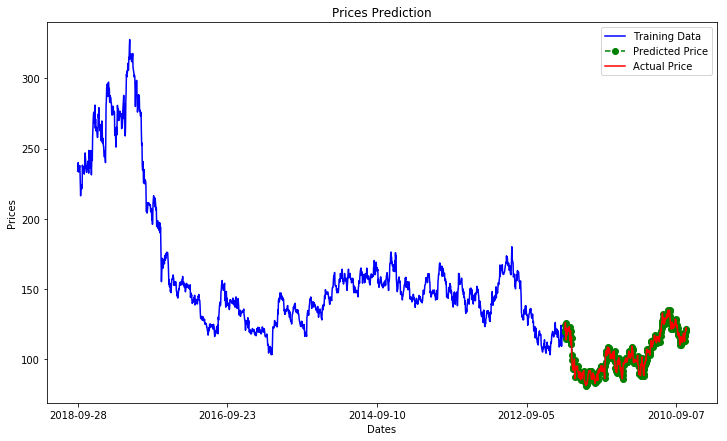

In [28]:
plt.figure(figsize=(12,7))
plt.plot(df['Open'],color='blue', label='Training Data')
plt.plot(test_data.index, predictions, color='green', marker='o', linestyle='dashed',label='Predicted Price')
plt.plot(test_data.index, test_data['Open'], color='red', label='Actual Price')
plt.title('Prices Prediction')
plt.xlabel('Dates')
plt.ylabel('Prices')
plt.xticks(np.arange(0,2034, 500), df['Date'][0:2034:500])
plt.legend()

In [ ]:
#Prediction : The prediction values almost match with the  actual values